In [1]:
from requests_oauthlib import OAuth1

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup

In [3]:
auth_params = {
    'app_key':'hz76GGcveHsN26QvAcTHhDVnn',
    'app_secret':'hrBmAzughGzIV7oMvYnMb3JqXBEa4nXnrhzNSDQ7pTPnjaxi4n',
    'oauth_token':'2547850260-3sVyHvzTYVTME2OEKhr9XEaZJ60eVvmSTMDwFDr',
    'oauth_token_secret':'CRJmrH50FcbMAvDrguTTmgrQwVp81avbLJKCXzulV1d2B'
}

# Creating an OAuth Client connection
auth = OAuth1 (
    auth_params['app_key'],
    auth_params['app_secret'],
    auth_params['oauth_token'],
    auth_params['oauth_token_secret']
)

In [4]:
# url according to twitter API
url_rest = "https://api.twitter.com/1.1/search/tweets.json"

# getting rid of retweets in the extraction results and filtering all replies to the tweet often uncessary for the analysis
q = '%40amazonIN -filter:retweets -filter:replies' # Twitter handle of Amazon India

# count : no of tweets to be retrieved per one call and parameters according to twitter API
params = {'q': q, 'count': 100, 'lang': 'en',  'result_type': 'recent'}
results = requests.get(url_rest, params=params, auth=auth)

In [66]:
p = '%40Flipkart -filter:retweets -filter:replies'
params2 = {'q': p, 'count': 1000, 'lang': 'en',  'result_type': 'recent'}
results2 = requests.get(url_rest, params=params2, auth=auth)

In [63]:
tweets = results.json()

messages = [BeautifulSoup(tweet['text'], 'html5lib').get_text() for tweet in tweets['statuses']]
print(messages)

['Download @amazonIN app now, play and win contest #AmazonFossilValentinesQuiz @amazon https://t.co/6b2oXQ23tD', 'Download @amazonIN app play and win contest #AmazonPaySpinAndWin @amazon https://t.co/6ue4tq2jda', 'I got this product yesterday delivered to my hostel and the product is damage after requesting return now they said… https://t.co/XTljB1bXH3', 'Order no. 408-7027865-7502737\nOrder on 05/02/20\nYour delivery executive behaved very badly with my family member… https://t.co/ULhts4L2PD', '#AmazonPaySpinAndWin\n@amazonIN \nHere I go of my spin. And correctly answered.\nDo remember me when you announce. https://t.co/3rQ0zkNOZX', "I got the #safari #safaribags from @amazonIN @amazon it's awesome 42Liter #travel bag. Outer material is good but i… https://t.co/GXzzCSJpBI", 'If you are searching for your\n\n#ValentinesDay Date on @amazonIN then you need serious relationship advice!!!… https://t.co/JoLyGihVjK', 'Hey @amazonIN can u tell me plz why these offers not working... https://t.

In [67]:
tweets2 = results2.json()

messages2 = [BeautifulSoup(tweet['text'], 'html5lib').get_text() for tweet in tweets2['statuses']]
print(messages2)

['Where is my order, always I am facing issue on Flipkart, I have orders regularly from Flipkart I am a regular custo… https://t.co/urStRR5Y6z', 'Please be informed that @Flipkart sells stale sweets with fungal infestation on its website and when customer reque… https://t.co/Wewt7IO7PE', 'Reply Received from @flipkartsupport ,\nIf option to remove UPI Address is not Available then why are you storing Pa… https://t.co/kmuIp7yDbx', 'Dear @Flipkart why not available \nAmul butter ?', 'Worst Service From flipkart.There is no importance for them that you are a plus member. They have no control over t… https://t.co/M57TuHSBK1', "What the heck is this, @flipkart won't reflect the money I paid and then they will charge late fee. Is this how you… https://t.co/vJ7KJeQhLQ", 'Hello @Flipkart @flipkartsupport I ordered  a jacket from you and I got the different one so I request refund for t… https://t.co/kNNoHUB5CH', 'Thank you @Flipkart  for your honesty!❤️ https://t.co/tiRavJQlw8', "Hey @Flipkart

In [6]:
r = '#amazonIN#headphone -filter:retweets -filter:replies'
params3 = {'q': r, 'count': 1000, 'lang': 'en',  'result_type': 'recent'}
results3 = requests.get(url_rest, params=params3, auth=auth)

tweets3 = results3.json()

messages3 = [BeautifulSoup(tweet['text'], 'html5lib').get_text() for tweet in tweets3['statuses']]
print(messages3)

[]


In [14]:
import pandas as pd

In [19]:
m = pd.DataFrame({'tweets' : messages})

In [20]:
m

,tweets
0,#AmazonPaySpinAndWin\nHope to win it @amazonIN...
1,On 22nd jan while rcving a prdct ordrd thu @am...
2,Private investment drying up\nhttps://t.co/OQC...
3,today amazonequize \n@amazon \n@amazonIN \n#Qu...
4,I'm using smart bulb of @Syska_LED since 2 yea...
...,...
95,Thanks for this quiz @amazonIN \n#Quiztimemorn...
96,#QuizTimeMorningsWithAmazon done @amazonIN htt...
97,Great opportunity to win @amazonIN \n#AmazonFo...
98,Thanks for this quiz @amazonIN \n#Quiztimemorn...


In [68]:
m2 = pd.DataFrame({'tweets' : messages2})
m2

,tweets
0,"Where is my order, always I am facing issue on..."
1,Please be informed that @Flipkart sells stale ...
2,"Reply Received from @flipkartsupport ,\nIf opt..."
3,Dear @Flipkart why not available \nAmul butter ?
4,Worst Service From flipkart.There is no import...
...,...
95,Dear @Flipkart I ordered a messenger bag on 2n...
96,i missed me my all ocasion due to flipkart . t...
97,Why on earth is @Flipkart selling pirated disc...
98,Dear @Flipkart please fix your delivery servic...


In [23]:
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random
import glob
from textblob import TextBlob
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [26]:
stop_words = list(set(stopwords.words('english')))

In [22]:
def cleanse(input_text):
    keep_alpha = re.sub("[^a-zA-Z]"," ",input_text)
    remove_extra_spaces = re.sub("[\s]+"," ",keep_alpha)
    convert_case = remove_extra_spaces.lower()
    stop_words_removal = [word for word in convert_case.split()
                          if word not in stop_words]
    remove_smaller_words = [word for word in stop_words_removal
                          if len(word) >=3]
    clean_tokens = [word for word in remove_smaller_words
                   if 'http' not in word and
                   '@' not in word and
                   '<' not in word and
                   'RT' not in word]
    return " ".join(clean_tokens)

In [24]:
lemmatizer = WordNetLemmatizer()

def lemmatize(input_text):
    lemmas=[]
    tokens = input_text.split()
    for token in tokens:
        tag = nltk.pos_tag([token])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        if tag in tag_dict.keys():
            pos = tag_dict[tag]
            lemma = lemmatizer.lemmatize(token,pos)
            lemmas.append(lemma)
        else:
            lemmas.append(token)
    return " ".join(lemmas)

In [27]:
m['clean_tweets'] = m['tweets'].apply(cleanse)

In [28]:
m['clean_tweets'] = m['clean_tweets'].apply(lemmatize)

In [29]:
m

,tweets,clean_tweets
0,#AmazonPaySpinAndWin\nHope to win it @amazonIN...,amazonpayspinandwin hope win amazonin amazonqu...
1,On 22nd jan while rcving a prdct ordrd thu @am...,jan rcving prdct ordrd thu amazonin elder brot...
2,Private investment drying up\nhttps://t.co/OQC...,private investment dry oqcn ovrgp exportersind...
3,today amazonequize \n@amazon \n@amazonIN \n#Qu...,today amazonequize amazon amazonin quiztimemor...
4,I'm using smart bulb of @Syska_LED since 2 yea...,use smart bulb syska lead since year still wor...
...,...,...
95,Thanks for this quiz @amazonIN \n#Quiztimemorn...,thanks quiz amazonin quiztimemorningswithamazo...
96,#QuizTimeMorningsWithAmazon done @amazonIN htt...,quiztimemorningswithamazon do amazonin sptgmg
97,Great opportunity to win @amazonIN \n#AmazonFo...,great opportunity win amazonin amazonfossilval...
98,Thanks for this quiz @amazonIN \n#Quiztimemorn...,thanks quiz amazonin quiztimemorningswithamazo...


In [30]:
def get_sentiment(input_string):
    blob = TextBlob(input_string)
    sentiment = blob.sentiment.polarity
    return sentiment

m['sentiment'] = m['clean_tweets'].apply(get_sentiment)

In [31]:
m

,tweets,clean_tweets,sentiment
0,#AmazonPaySpinAndWin\nHope to win it @amazonIN...,amazonpayspinandwin hope win amazonin amazonqu...,0.800000
1,On 22nd jan while rcving a prdct ordrd thu @am...,jan rcving prdct ordrd thu amazonin elder brot...,0.000000
2,Private investment drying up\nhttps://t.co/OQC...,private investment dry oqcn ovrgp exportersind...,-0.033333
3,today amazonequize \n@amazon \n@amazonIN \n#Qu...,today amazonequize amazon amazonin quiztimemor...,0.000000
4,I'm using smart bulb of @Syska_LED since 2 yea...,use smart bulb syska lead since year still wor...,0.409524
...,...,...,...
95,Thanks for this quiz @amazonIN \n#Quiztimemorn...,thanks quiz amazonin quiztimemorningswithamazo...,0.200000
96,#QuizTimeMorningsWithAmazon done @amazonIN htt...,quiztimemorningswithamazon do amazonin sptgmg,0.000000
97,Great opportunity to win @amazonIN \n#AmazonFo...,great opportunity win amazonin amazonfossilval...,0.800000
98,Thanks for this quiz @amazonIN \n#Quiztimemorn...,thanks quiz amazonin quiztimemorningswithamazo...,0.200000


In [33]:
negative_counts = m[m['sentiment']<0].count()[0]
neutral_counts = m[m['sentiment']==0].count()[0]
positive_counts = m[m['sentiment']>0].count()[0]

print(negative_counts)
print(neutral_counts)
print(positive_counts)

5
39
56


In [36]:
y_pos = [0,1,2]
counts = [positive_counts,neutral_counts,negative_counts]

import matplotlib.pyplot as plt

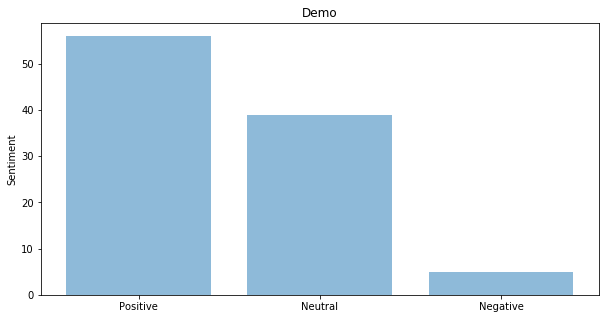

In [35]:
plt.figure(figsize=(10,5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos,['Positive','Neutral','Negative'])
plt.ylabel('Sentiment')
plt.title('Demo')
plt.show()

In [69]:
m2['clean_tweets'] = m2['tweets'].apply(cleanse)
m2['clean_tweets'] = m2['clean_tweets'].apply(lemmatize)
m2['sentiment'] = m2['clean_tweets'].apply(get_sentiment)
m2

,tweets,clean_tweets,sentiment
0,"Where is my order, always I am facing issue on...",order always face issue flipkart order regular...,0.0000
1,Please be informed that @Flipkart sells stale ...,please inform flipkart sell stale sweet fungal...,-0.0750
2,"Reply Received from @flipkartsupport ,\nIf opt...",reply receive flipkartsupport option remove up...,0.4000
3,Dear @Flipkart why not available \nAmul butter ?,dear flipkart available amul butter,0.4000
4,Worst Service From flipkart.There is no import...,bad service flipkart importance plus member co...,-0.7000
...,...,...,...
95,Dear @Flipkart I ordered a messenger bag on 2n...,dear flipkart order messenger bag fab still wa...,0.0000
96,i missed me my all ocasion due to flipkart . t...,miss ocasion due flipkart service bad product ...,-0.4125
97,Why on earth is @Flipkart selling pirated disc...,earth flipkart sell pirate disc movie theconju...,0.0000
98,Dear @Flipkart please fix your delivery servic...,dear flipkart please fix delivery service trai...,0.1000


In [71]:
negative_counts = m2[m2['sentiment']<0].count()[0]
neutral_counts = m2[m2['sentiment']==0].count()[0]
positive_counts = m2[m2['sentiment']>0].count()[0]

y_pos = [0,1,2]
counts = [positive_counts,neutral_counts,negative_counts]

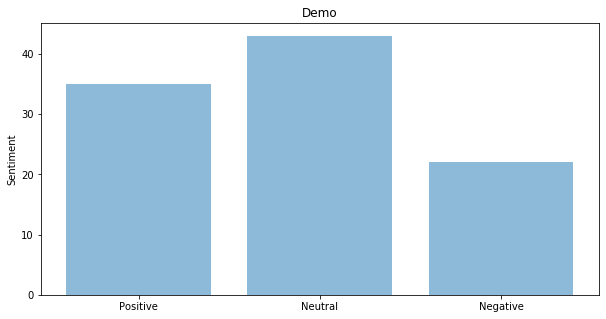

In [72]:
plt.figure(figsize=(10,5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos,['Positive','Neutral','Negative'])
plt.ylabel('Sentiment')
plt.title('Demo')
plt.show()

In [37]:
vectorizer1 = TfidfVectorizer(ngram_range=(2,2),
                             max_features=100,
                             min_df=0.01,
                             max_df=0.80)

In [38]:
vect1 = vectorizer1.fit_transform(m['clean_tweets'])

In [39]:
#top 10 words in TF-IDF (word, TF-IDF value, index)

top_n= 200
indices = vectorizer1.idf_.argsort()[::-1] # sort by TF-IDF
features = vectorizer1.get_feature_names() # word list
top_features = [(features[i], vectorizer1.idf_[i],i)
               for i in indices[:top_n]]

In [40]:
d = {}
for i in top_features:
    d[i[0]] = i[1]
    
w = WordCloud(background_color='white',
             max_words=200,
             max_font_size=200,
             height=2000,
             width=2000,
             colormap='rainbow').fit_words(d)

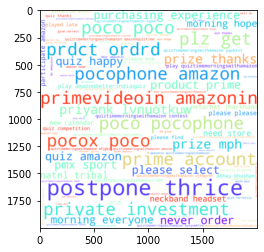

In [41]:
w.to_file('demo.png')
plt.imshow(w, interpolation='bilinear')

<img src='demo.png'>